In [1]:
import os
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import abline_plot
import matplotlib
import geopandas
from scipy import stats
from sklearn.decomposition import PCA

In [2]:
pd.options.display.max_columns = 100

In [3]:
os.getcwd()

'/Users/alvastrand/Library/Mobile Documents/com~apple~CloudDocs/Documents/OU/Research/notebooks/Casey'

In [5]:
path = '/Volumes/TOSHIBA EXT/Data/Processed/arrival_master_2022-05-13_5000/'

os.chdir(path)

In [6]:
os.getcwd()

'/Volumes/TOSHIBA EXT/Data/Processed/arrival_master_2022-05-13_5000'

In [7]:
filename = 'arrival_master_2022-05-13.csv'

df = pd.read_csv(filename)
print(df.shape)

df.head(2)

(15012, 18)


,species,cell,cell_lat,cell_lng,year,arr_GAM_mean,arr_GAM_sd,VALID_GAM,arr_IAR_mean,arr_IAR_sd,sigma_beta0_mean,sigma_beta0_sd,beta_gamma_mean,beta_gamma_sd,plmax,num_diverge,max_Rhat,min_neff
0,Chaetura_pelagica,4,24,-84,2002,NaN,NaN,False,90.909590,5.920687,2.021079,0.468736,1.776108,0.105277,NaN,0,1.0,910
1,Chaetura_pelagica,5,24,-82,2002,NaN,NaN,False,93.301279,5.457043,2.021079,0.468736,1.776108,0.105277,NaN,0,1.0,910


In [8]:
df = df.rename(columns={'cell_lat': 'lat', 'cell_lng': 'lon'})

df = df.sort_values(by=['species', 'cell', 'year'])

df = df.reset_index(drop=True)

print(df.shape)

df.head(2)

(15012, 18)


,species,cell,lat,lon,year,arr_GAM_mean,arr_GAM_sd,VALID_GAM,arr_IAR_mean,arr_IAR_sd,sigma_beta0_mean,sigma_beta0_sd,beta_gamma_mean,beta_gamma_sd,plmax,num_diverge,max_Rhat,min_neff
0,Antrostomus_carolinensis,4,24,-84,2010,NaN,NaN,False,75.560371,9.075519,2.981226,1.211438,3.501294,0.263926,NaN,0,1.01,716
1,Antrostomus_carolinensis,4,24,-84,2011,NaN,NaN,False,69.553227,9.223410,2.981226,1.211438,3.501294,0.263926,NaN,0,1.01,716


In [9]:
os.getcwd()

'/Volumes/TOSHIBA EXT/Data/Processed/arrival_master_2022-05-13_5000'

In [10]:
path = '/Users/alvastrand/Library/Mobile Documents/com~apple~CloudDocs/Documents/OU/Research/data/output/'

os.chdir(path)

In [11]:
os.getcwd()

'/Users/alvastrand/Library/Mobile Documents/com~apple~CloudDocs/Documents/OU/Research/data/output'

In [12]:
filename = 'ncep_narr_air_2m_ebd_US_states_east_Mississippi_0101_0731_complete_zerofilled_grid_cell_ids_2002_2019_relApr-2020_Casey_lats_lons.csv'

df_t = pd.read_csv(filename)
print(df_t.shape)

df_t.head(2)

(3276, 6)


,cell,year,air_temp_kelvin,gr_mn,cell_lat,cell_lng
0,0,2002,294.254356,21.104356,24.0,-92.0
1,0,2003,293.627635,20.477635,24.0,-92.0


In [13]:
df_t = df_t.rename(columns={'gr_mn': 'air_temp_degrees_celsius', 'cell_lat': 'lat', 'cell_lng': 'lon'})

df_t = df_t[['cell', 'lat', 'lon', 'year', 'air_temp_kelvin', 'air_temp_degrees_celsius']]

df_t = df_t.sort_values(by=['cell', 'year'])

df_t = df_t.reset_index(drop=True)

print(df_t.shape)

df_t.head(2)

(3276, 6)


,cell,lat,lon,year,air_temp_kelvin,air_temp_degrees_celsius
0,0,24.0,-92.0,2002,294.254356,21.104356
1,0,24.0,-92.0,2003,293.627635,20.477635


In [14]:
df_t[df_t['cell'] == 44]

,cell,lat,lon,year,air_temp_kelvin,air_temp_degrees_celsius
792,44,30.0,-88.0,2002,282.853156,9.703156
793,44,30.0,-88.0,2003,284.095210,10.945210
794,44,30.0,-88.0,2004,282.941903,9.791903
795,44,30.0,-88.0,2005,283.653124,10.503124
796,44,30.0,-88.0,2006,283.658112,10.508112
797,44,30.0,-88.0,2007,282.441679,9.291679
798,44,30.0,-88.0,2008,282.849587,9.699587
799,44,30.0,-88.0,2009,282.637101,9.487101
800,44,30.0,-88.0,2010,280.577890,7.427890
801,44,30.0,-88.0,2011,283.763989,10.613989


Change in temperature as a function of time

182
0.08921993921552289
0.13533384076496136
0.13310334200220994


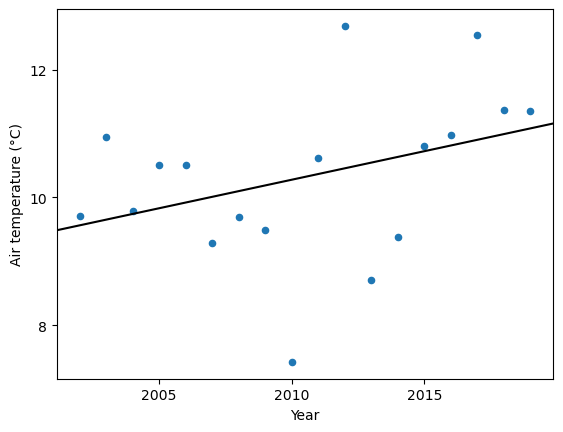

(182, 5)


In [15]:
list_cells_t = df_t['cell'].unique()
print(len(list_cells_t))

list_slopes = []
list_intercepts = []
list_r_squared = []
list_p_values = []

for cell in list_cells_t:
    
    df_cell_t = df_t[df_t['cell'] == cell]
    
    model_ols = smf.ols(formula='air_temp_degrees_celsius ~ year', data=df_cell_t)

    res_ols = model_ols.fit()

    # print(res_ols.summary())

    list_slopes.append(res_ols.params[1])

    list_intercepts.append(res_ols.params[0])

    list_r_squared.append(res_ols.rsquared)

    list_p_values.append(res_ols.pvalues[1])
    
    if cell == 44:
        
        print(res_ols.params[1])

        print(res_ols.rsquared)

        print(res_ols.pvalues[1])

        ax = df_cell_t.plot.scatter(x='year', y='air_temp_degrees_celsius')

        abline_plot(model_results=res_ols, ax=ax, color='black')

        plt.rc('font', size=24)
        plt.rc('axes', titlesize=24)
        plt.rc('axes', labelsize=24)
        plt.rc('xtick', labelsize=24)
        plt.rc('ytick', labelsize=24)

        plt.xlabel('Year')

        plt.ylabel('Air temperature (°C)')

        plt.savefig('20220621_temperature_change.pdf', bbox_inches='tight')

        plt.show()
    
df_results_t = pd.DataFrame(data={'cell': list_cells_t, 'slope_temp_change_all_years': list_slopes, 'intercept_temp_change_all_years': list_intercepts, 
                                'r_squared_temp_change_all_years': list_r_squared, 'p_value_temp_change_all_years': list_p_values})
print(df_results_t.shape)

In [16]:
df_results_t.head(2)

,cell,slope_temp_change_all_years,intercept_temp_change_all_years,r_squared_temp_change_all_years,p_value_temp_change_all_years
0,0,0.047530,-74.496379,0.081582,0.250578
1,1,0.050006,-79.129506,0.097866,0.206236


Temperature variance?

In [17]:
df_merged = df.merge(df_t, on=['cell', 'year', 'lat', 'lon'])
print(df_merged.shape)

df_merged.head(2)

(15012, 20)


,species,cell,lat,lon,year,arr_GAM_mean,arr_GAM_sd,VALID_GAM,arr_IAR_mean,arr_IAR_sd,sigma_beta0_mean,sigma_beta0_sd,beta_gamma_mean,beta_gamma_sd,plmax,num_diverge,max_Rhat,min_neff,air_temp_kelvin,air_temp_degrees_celsius
0,Antrostomus_carolinensis,4,24,-84,2010,NaN,NaN,False,75.560371,9.075519,2.981226,1.211438,3.501294,0.263926,NaN,0,1.01,716,292.121459,18.971459
1,Antrostomus_vociferus,4,24,-84,2010,NaN,NaN,False,58.827179,7.212024,0.998877,0.743532,3.464462,0.242849,NaN,0,1.00,886,292.121459,18.971459


In [18]:
df_merged = df_merged.dropna(subset=['arr_GAM_mean'])
print(df_merged.shape)

df_merged.head(2)

(6016, 20)


,species,cell,lat,lon,year,arr_GAM_mean,arr_GAM_sd,VALID_GAM,arr_IAR_mean,arr_IAR_sd,sigma_beta0_mean,sigma_beta0_sd,beta_gamma_mean,beta_gamma_sd,plmax,num_diverge,max_Rhat,min_neff,air_temp_kelvin,air_temp_degrees_celsius
104,Hirundo_rustica,5,24,-82,2010,88.097333,8.149519,True,83.163503,3.758457,2.85316,0.633302,2.053789,0.098024,0.997,0,1.0,945,290.741547,17.591547
114,Hirundo_rustica,5,24,-82,2011,77.195000,15.197718,False,80.224858,4.138189,2.85316,0.633302,2.053789,0.098024,0.999,0,1.0,945,293.115626,19.965626


In [19]:
df_merged = df_merged[df_merged['VALID_GAM'] == True]

df_merged = df_merged.reset_index(drop=True)

print(df_merged.shape)

df_merged.head(2)

(4724, 20)


,species,cell,lat,lon,year,arr_GAM_mean,arr_GAM_sd,VALID_GAM,arr_IAR_mean,arr_IAR_sd,sigma_beta0_mean,sigma_beta0_sd,beta_gamma_mean,beta_gamma_sd,plmax,num_diverge,max_Rhat,min_neff,air_temp_kelvin,air_temp_degrees_celsius
0,Hirundo_rustica,5,24,-82,2010,88.097333,8.149519,True,83.163503,3.758457,2.85316,0.633302,2.053789,0.098024,0.997,0,1.0,945,290.741547,17.591547
1,Hirundo_rustica,5,24,-82,2012,84.357667,13.455486,True,82.674423,3.737352,2.85316,0.633302,2.053789,0.098024,1.000,0,1.0,945,293.728819,20.578819


In [20]:
df_merged[(df_merged['species'] == 'Hirundo_rustica') & (df_merged['cell'] == 44)]

,species,cell,lat,lon,year,arr_GAM_mean,arr_GAM_sd,VALID_GAM,arr_IAR_mean,arr_IAR_sd,sigma_beta0_mean,sigma_beta0_sd,beta_gamma_mean,beta_gamma_sd,plmax,num_diverge,max_Rhat,min_neff,air_temp_kelvin,air_temp_degrees_celsius
153,Hirundo_rustica,44,30,-88,2010,93.833000,4.605958,True,88.614481,2.549135,2.85316,0.633302,2.053789,0.098024,1.000,0,1.0,945,280.577890,7.427890
158,Hirundo_rustica,44,30,-88,2011,77.761000,3.578009,True,82.268383,2.337471,2.85316,0.633302,2.053789,0.098024,1.000,0,1.0,945,283.763989,10.613989
162,Hirundo_rustica,44,30,-88,2012,80.477000,2.771167,True,81.987613,2.025846,2.85316,0.633302,2.053789,0.098024,1.000,0,1.0,945,285.832635,12.682635
164,Hirundo_rustica,44,30,-88,2013,83.750667,4.469432,True,83.671248,2.382152,2.85316,0.633302,2.053789,0.098024,1.000,0,1.0,945,281.864411,8.714411
169,Hirundo_rustica,44,30,-88,2014,84.419000,2.804888,True,83.889125,2.046157,2.85316,0.633302,2.053789,0.098024,1.000,0,1.0,945,282.537875,9.387875
179,Hirundo_rustica,44,30,-88,2016,90.025333,2.526028,True,88.387755,1.880724,2.85316,0.633302,2.053789,0.098024,1.000,0,1.0,945,284.122688,10.972688
186,Hirundo_rustica,44,30,-88,2017,84.660333,1.625169,True,84.697542,1.402585,2.85316,0.633302,2.053789,0.098024,1.000,0,1.0,945,285.694318,12.544318
193,Hirundo_rustica,44,30,-88,2018,80.787667,1.562070,True,80.758842,1.381167,2.85316,0.633302,2.053789,0.098024,1.000,0,1.0,945,284.511813,11.361813
200,Hirundo_rustica,44,30,-88,2019,85.056667,1.404794,True,85.228343,1.264369,2.85316,0.633302,2.053789,0.098024,1.000,0,1.0,945,284.501745,11.351745
4094,Hirundo_rustica,44,30,-88,2007,77.814000,8.231119,True,88.228038,3.106850,2.85316,0.633302,2.053789,0.098024,1.000,0,1.0,945,282.441679,9.291679


In [21]:
len(df_merged[(df_merged['species'] == 'Hirundo_rustica') & (df_merged['cell'] == 44)])

12

In [22]:
list_sci_names = sorted(df_merged['species'].unique())
print(len(list_sci_names))

10


In [23]:
def get_change_in_temp(species, df_species, list_cells):

    list_slopes = []
    list_intercepts = []
    list_r_squared = []
    list_p_values = []

    for cell in list_cells:

        df_cell_t = df_species[df_species['cell'] == cell]

        model_ols = smf.ols(formula='air_temp_degrees_celsius ~ year', data=df_cell_t)

        res_ols = model_ols.fit()

        # print(res_ols.summary())

        list_slopes.append(res_ols.params[1])

        list_intercepts.append(res_ols.params[0])

        list_r_squared.append(res_ols.rsquared)

        list_p_values.append(res_ols.pvalues[1])
        
        if cell == 44 and species == 'Hirundo_rustica':
        
            print(res_ols.rsquared)

            print(res_ols.pvalues[1])

            ax = df_cell_t.plot.scatter(x='year', y='air_temp_degrees_celsius')

            abline_plot(model_results=res_ols, ax=ax, color='black')

            plt.rc('font', size=24)
            plt.rc('axes', titlesize=24)
            plt.rc('axes', labelsize=24)
            plt.rc('xtick', labelsize=24)
            plt.rc('ytick', labelsize=24)

            plt.xlabel('Year')

            plt.ylabel('Air temperature (°C)')

            plt.savefig('20220621_temperature_change.pdf', bbox_inches='tight')

            plt.show()

    df_results_t = pd.DataFrame(data={'cell': list_cells, 'slope_temp_change': list_slopes, 'intercept_temp_change': list_intercepts, 
                                    'r_squared_temp_change': list_r_squared, 'p_value_temp_change': list_p_values})
    
    return df_results_t

In [24]:
df_speeds = df_merged[['species', 'beta_gamma_mean']].drop_duplicates()

df_speeds = df_speeds.reset_index(drop=True)
print(df_speeds.shape)

df_speeds.head(2)

(10, 2)


,species,beta_gamma_mean
0,Hirundo_rustica,2.053789
1,Chordeiles_minor,1.363545


In [25]:
df_means = df_merged[['species', 'arr_IAR_mean']].groupby(['species']).mean()

df_means = df_means.reset_index()

df_means = df_means.rename(columns={'arr_IAR_mean': 'mean_arrival_day'})

print(df_means.shape)

df_means.head(2)

(10, 2)


,species,mean_arrival_day
0,Antrostomus_carolinensis,108.002908
1,Antrostomus_vociferus,114.550493


In [26]:
df_speeds_means = df_speeds.merge(df_means, on='species')

df_speeds_means = df_speeds_means.rename(columns={'species': 'scientific_name'})

df_speeds_means['scientific_name'] = df_speeds_means['scientific_name'].str.replace('_', ' ')

print(df_speeds_means.shape)

df_speeds_means.head(2)

(10, 3)


,scientific_name,beta_gamma_mean,mean_arrival_day
0,Hirundo rustica,2.053789,105.614979
1,Chordeiles minor,1.363545,125.892520


In [27]:
os.getcwd()

'/Users/alvastrand/Library/Mobile Documents/com~apple~CloudDocs/Documents/OU/Research/data/output'

In [28]:
path = '/Users/alvastrand/Downloads/states_21basic/'

os.chdir(path)

In [29]:
os.getcwd()

'/Users/alvastrand/Downloads/states_21basic'

In [30]:
df_usa = geopandas.read_file('states.shp')
print(df_usa.shape)

df_usa.head(2)

(51, 6)


,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."


In [31]:
df_usa_c = df_usa[(df_usa['STATE_NAME'] == 'Alabama') | (df_usa['STATE_NAME'] == 'Connecticut') | 
                  (df_usa['STATE_NAME'] == 'Delaware') | (df_usa['STATE_NAME'] == 'Florida') | 
                  (df_usa['STATE_NAME'] == 'Georgia') | (df_usa['STATE_NAME'] == 'Illinois') | 
                  (df_usa['STATE_NAME'] == 'Indiana') | (df_usa['STATE_NAME'] == 'Kentucky') | 
                  (df_usa['STATE_NAME'] == 'Maine') | (df_usa['STATE_NAME'] == 'Maryland') | 
                  (df_usa['STATE_NAME'] == 'Massachusetts') | (df_usa['STATE_NAME'] == 'Michigan') | 
                  (df_usa['STATE_NAME'] == 'Missouri') | (df_usa['STATE_NAME'] == 'New Hampshire') | 
                  (df_usa['STATE_NAME'] == 'New Jersey') | (df_usa['STATE_NAME'] == 'New York') | 
                  (df_usa['STATE_NAME'] == 'North Carolina') | (df_usa['STATE_NAME'] == 'Ohio') | 
                  (df_usa['STATE_NAME'] == 'Pennsylvania') | (df_usa['STATE_NAME'] == 'Rhode Island') | 
                  (df_usa['STATE_NAME'] == 'South Carolina') | (df_usa['STATE_NAME'] == 'Tennessee') | 
                  (df_usa['STATE_NAME'] == 'Vermont') | (df_usa['STATE_NAME'] == 'Virginia') | 
                  (df_usa['STATE_NAME'] == 'West Virginia') | (df_usa['STATE_NAME'] == 'Wisconsin')]

df_usa_c = df_usa_c.reset_index(drop=True)

print(df_usa_c.shape)

df_usa_c.head(2)

(26, 6)


,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
1,Wisconsin,8,55,East North Central,WI,"MULTIPOLYGON (((-87.74856 44.96162, -87.83999 ..."


In [32]:
number_of_years = 5

# number_of_years = 3

In [33]:
# predictor_variable = 'year'

predictor_variable = 'air_temp_degrees_celsius'

In [34]:
def name_of_function(species, predictor_variable):

    df_species = df_merged[df_merged['species'] == species]
    
    df_species = df_species.drop(columns='air_temp_kelvin')

    print(df_species.shape)

    # print(df_species.head(2))
    
    # !
    
    # model_mixed = smf.mixedlm("arr_IAR_mean ~ air_temp_degrees_celsius", df_species, groups=df_species['lat'])

    # fit_mixed = model_mixed.fit()

    # print(fit_mixed.summary())
    
    # model_ols = smf.ols(formula='arr_IAR_mean ~ air_temp_degrees_celsius', data=df_species)

    # res_ols = model_ols.fit()
    
    # print(res_ols.summary())

    df_cnt = df_species[['cell', 'year']].groupby(['cell']).count()

    df_cnt = df_cnt.reset_index()

    df_cnt = df_cnt.rename(columns={'year': 'number_of_years'})

    print(df_cnt.shape)

    # print(df_cnt.head(2))

    list_cells = list(df_cnt[df_cnt['number_of_years'] >= number_of_years]['cell'])
    print(len(list_cells))

    print(len(list(df_cnt[df_cnt['number_of_years'] >= 3]['cell'])))

    df_species = df_species[df_species['cell'].isin(list_cells)]
    print(df_species.shape)

    list_slopes = []
    list_intercepts = []
    list_r_squared = []
    list_p_values = []

    for cell in list_cells:

        df_cell = df_species[df_species['cell'] == cell]

        model_ols = smf.ols(formula='arr_IAR_mean' + ' ~ ' + predictor_variable, data=df_cell)

        res_ols = model_ols.fit()

        # print(res_ols.summary())

        list_slopes.append(res_ols.params[1])

        list_intercepts.append(res_ols.params[0])

        list_r_squared.append(res_ols.rsquared)

        list_p_values.append(res_ols.pvalues[1])
        
        if (species == 'Hirundo_rustica') & (res_ols.params[1] < -0.8):

            print(cell)
            
            print(res_ols.params[1])

            print(res_ols.rsquared)
            
            print(res_ols.pvalues[1])

            ax = df_cell.plot.scatter(x=predictor_variable, y='arr_IAR_mean')

            abline_plot(model_results=res_ols, ax=ax, color='black')

            plt.rc('font', size=24)
            plt.rc('axes', titlesize=24)
            plt.rc('axes', labelsize=24)
            plt.rc('xtick', labelsize=24)
            plt.rc('ytick', labelsize=24)

            plt.xlabel('Mean minimum daily spring air temperature (°C)')
            
            plt.ylabel('Mean arrival day')
            
#             plt.savefig('20220621_temperature.pdf', bbox_inches='tight')

            plt.show()

    df_results = pd.DataFrame(data={'cell': list_cells, 'slope': list_slopes, 'intercept': list_intercepts, 
                                    'r_squared': list_r_squared, 'p_value': list_p_values})
    print(df_results.shape)

    # print(df_results.head(2))

    # Quality control?

    df_lat_lon = df_t[['cell', 'lat', 'lon']].drop_duplicates()

    # print(df_lat_lon.shape)

    # print(df_lat_lon.head(2))

    df_results = df_results.merge(df_lat_lon, on='cell')

    df_results['scientific_name'] = species

    print(df_results.shape)

    # print(df_results.head(2))
    
    # Latitude

    predictor_variable = 'lat'

    model_ols = smf.ols(formula='slope' + ' ~ ' + predictor_variable, data=df_results)

    res_ols = model_ols.fit()

    slope_lat = res_ols.params[1]
    # print(slope_lat)
    
#     if species == 'Hirundo_rustica':
        
#         print(res_ols.rsquared)

#         print(res_ols.pvalues[1])

#         ax = df_results.plot.scatter(x=predictor_variable, y='slope')

#         abline_plot(model_results=res_ols, ax=ax, color='black')

#         plt.rc('font', size=24)
#         plt.rc('axes', titlesize=24)
#         plt.rc('axes', labelsize=24)
#         plt.rc('xtick', labelsize=24)
#         plt.rc('ytick', labelsize=24)

#         plt.xlabel('Latitude')

#         plt.ylabel('Sensitivity (days/°C)')

#         plt.savefig('20220621_latitude.pdf', bbox_inches='tight')

#         plt.show()
    
    # Change in temperature as a function of time
    
    df_results_t_species = get_change_in_temp(species, df_species, list_cells)
    print(df_results_t_species.shape)
    
    # print(df_results_t_species.head(2))
    
    df_results = df_results.merge(df_results_t_species, on='cell')
    print(df_results.shape)

    # print(df_results.head(2))

    model_ols = smf.ols(formula='slope ~ slope_temp_change', data=df_results)

    res_ols = model_ols.fit()

    slope_temp_change = res_ols.params[1]
    # print(slope_temp_change)
        
    r_squared_temp_change = res_ols.rsquared
    # print(r_squared_temp_change)

    p_value_temp_change = res_ols.pvalues[1]
    # print(p_value_temp_change)
    
    err_temp_change = slope_temp_change - res_ols.conf_int()[0]['slope_temp_change']
    # print(err_temp_change)
    
    if species == 'Hirundo_rustica':

        ax = df_results.plot.scatter(x='slope_temp_change', y='slope')

        abline_plot(model_results=res_ols, ax=ax, color='black')
        
        plt.axhline(y=0, color='grey', linestyle='--')
        
        plt.axvline(x=0, color='grey', linestyle='--')

        plt.rc('font', size=24)
        plt.rc('axes', titlesize=24)
        plt.rc('axes', labelsize=24)
        plt.rc('xtick', labelsize=24)
        plt.rc('ytick', labelsize=24)

        plt.xlabel('Air temperature change over time (°C/year)')

        plt.ylabel('Sensitivity (days/°C)')

#         plt.savefig('20220621_sens_temperature_change.pdf', bbox_inches='tight')

        plt.show()
    
    # All of the years
    
    df_results = df_results.merge(df_results_t, on='cell')
    print(df_results.shape)

    # print(df_results.head(2))

    model_ols = smf.ols(formula='slope ~ slope_temp_change_all_years', data=df_results)

    res_ols = model_ols.fit()

    slope_temp_change_all_years = res_ols.params[1]
    print(slope_temp_change_all_years)
        
    r_squared_temp_change_all_years = res_ols.rsquared
    print(r_squared_temp_change_all_years)

    p_value_temp_change_all_years = res_ols.pvalues[1]
    print(p_value_temp_change_all_years)
    
    err_temp_change_all_years = slope_temp_change_all_years - res_ols.conf_int()[0]['slope_temp_change_all_years']
    print(err_temp_change_all_years)
    
    if species == 'Hirundo_rustica':

        ax = df_results.plot.scatter(x='slope_temp_change_all_years', y='slope')

        abline_plot(model_results=res_ols, ax=ax, color='black')
        
        plt.axhline(y=0, color='grey', linestyle='--')
        
        plt.axvline(x=0, color='grey', linestyle='--')

        plt.rc('font', size=24)
        plt.rc('axes', titlesize=24)
        plt.rc('axes', labelsize=24)
        plt.rc('xtick', labelsize=24)
        plt.rc('ytick', labelsize=24)

        plt.xlabel('Air temperature change over time (°C/year)')

        plt.ylabel('Sensitivity (days/°C)')

        plt.savefig('20220621_sens_temperature_change.pdf', bbox_inches='tight')

        plt.show()
    
    # Heat map
    
    if species == 'Hirundo_rustica':
    
        # print(df_results['slope'].min())
        # print(np.floor(df_results['slope'].min()))
        # print(df_results['slope'].max())
        # print(np.ceil(df_results['slope'].max()))

        abs_floor_min_slope = np.absolute(np.floor(df_results['slope'].min()))

        abs_ceil_max_slope = np.absolute(np.ceil(df_results['slope'].max()))

        greatest_abs = max([abs_floor_min_slope, abs_ceil_max_slope])

        v_min = -greatest_abs

        v_max = greatest_abs

        norm = matplotlib.colors.Normalize(vmin=v_min, vmax=v_max)

        df_g = geopandas.GeoDataFrame(df_results, geometry=geopandas.points_from_xy(df_results['lon'], 
                                                                                    df_results['lat']))
        print(df_g.shape)

        df_g.head(2)

        df_usa_c.plot(color='white', edgecolor='grey', figsize=(10, 10))

        sc = plt.scatter('lon', 'lat', s=1080, c='slope', alpha=0.8, cmap='viridis', data=df_g, 
                         norm=norm, edgecolor='black', marker='s')
        
        # cmap='RdBu_r'

        cbar = plt.colorbar(sc, fraction=0.0241, pad=0.015)

        cbar.set_label('Sensitivity (days/°C)')

        plt.rc('font', size=24)
        plt.rc('axes', titlesize=24)
        plt.rc('axes', labelsize=24)
        plt.rc('xtick', labelsize=24)
        plt.rc('ytick', labelsize=24)

        plt.savefig('20220621.pdf', bbox_inches='tight')

        plt.show()
    
    return df_results, slope_lat, slope_temp_change, r_squared_temp_change, p_value_temp_change, err_temp_change, \
slope_temp_change_all_years, r_squared_temp_change_all_years, p_value_temp_change_all_years, err_temp_change_all_years

Antrostomus_carolinensis
(174, 19)
(39, 2)
21
29
(132, 19)
(21, 5)
(21, 8)
(21, 5)
(21, 12)
(21, 16)
-16.03137523226674
0.19969101550414448
0.042264583117030644
15.410537333092822
Antrostomus_vociferus
(217, 19)
(46, 2)
24
32
(168, 19)
(24, 5)
(24, 8)


/var/folders/94/vmb3wczd7g1fpr9_16m011tw0000gn/T/ipykernel_2207/2104756220.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_all_species = df_results_all_species.append(df_results_species)


(24, 5)
(24, 12)
(24, 16)
-5.195166394221975
0.18405679677090614
0.03644355273452641
4.836423559906004
Chaetura_pelagica
(818, 19)
(79, 2)
70
76
(793, 19)


/var/folders/94/vmb3wczd7g1fpr9_16m011tw0000gn/T/ipykernel_2207/2104756220.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_all_species = df_results_all_species.append(df_results_species)


(70, 5)
(70, 8)
(70, 5)
(70, 12)
(70, 16)
-2.5773815998314507
0.06094480866690466
0.03937185850840874
2.4481974297218767
Chordeiles_minor
(328, 19)
(64, 2)
36
47
(261, 19)
(36, 5)
(36, 8)


/var/folders/94/vmb3wczd7g1fpr9_16m011tw0000gn/T/ipykernel_2207/2104756220.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_all_species = df_results_all_species.append(df_results_species)


(36, 5)
(36, 12)
(36, 16)
-2.2994430877654164
0.041554927498314576
0.23306223389111796
3.8488546935769268
Hirundo_rustica
(801, 19)
(80, 2)
73
80
(775, 19)
5
-0.8981856833557629
0.34599490368854824
0.12509236973196636


/var/folders/94/vmb3wczd7g1fpr9_16m011tw0000gn/T/ipykernel_2207/2104756220.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_all_species = df_results_all_species.append(df_results_species)


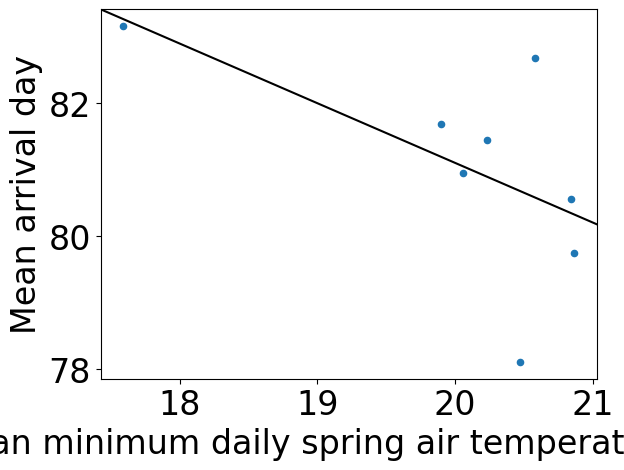

44
-0.8425107192344683
0.2495414912317011
0.09821223577116883


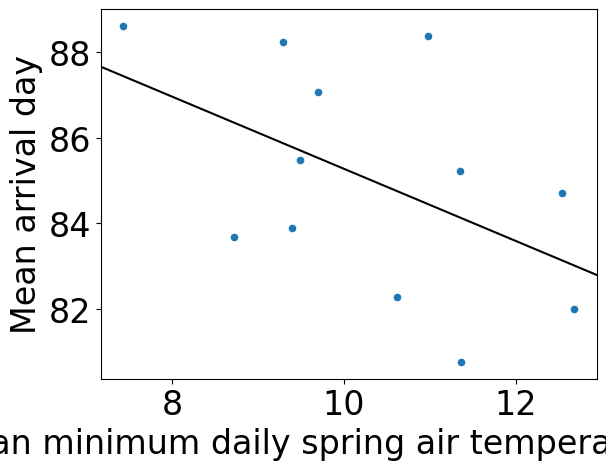

(73, 5)
(73, 8)
0.32534335308855156
0.052798516687056776


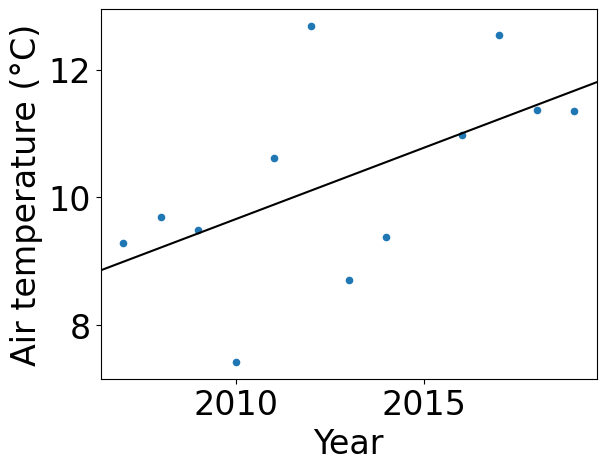

(73, 5)
(73, 12)


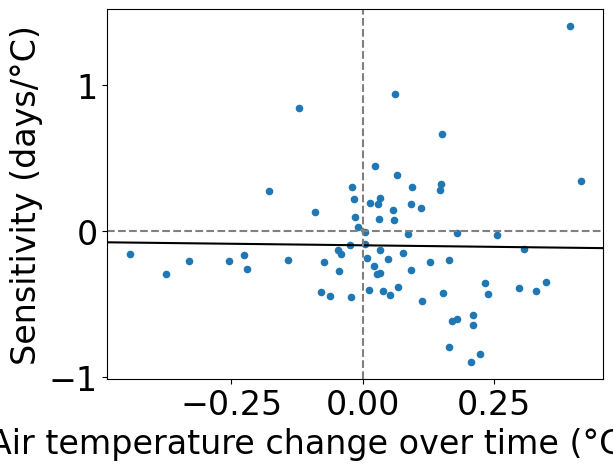

(73, 16)
-2.6205271470305913
0.06403358017524963
0.03077114369193247
2.370819821581855


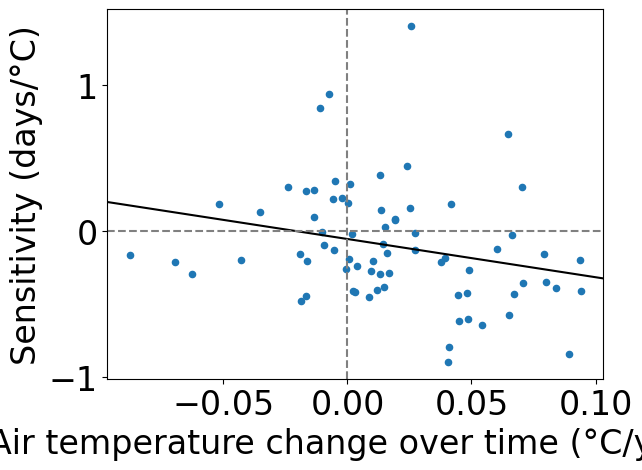

(73, 17)


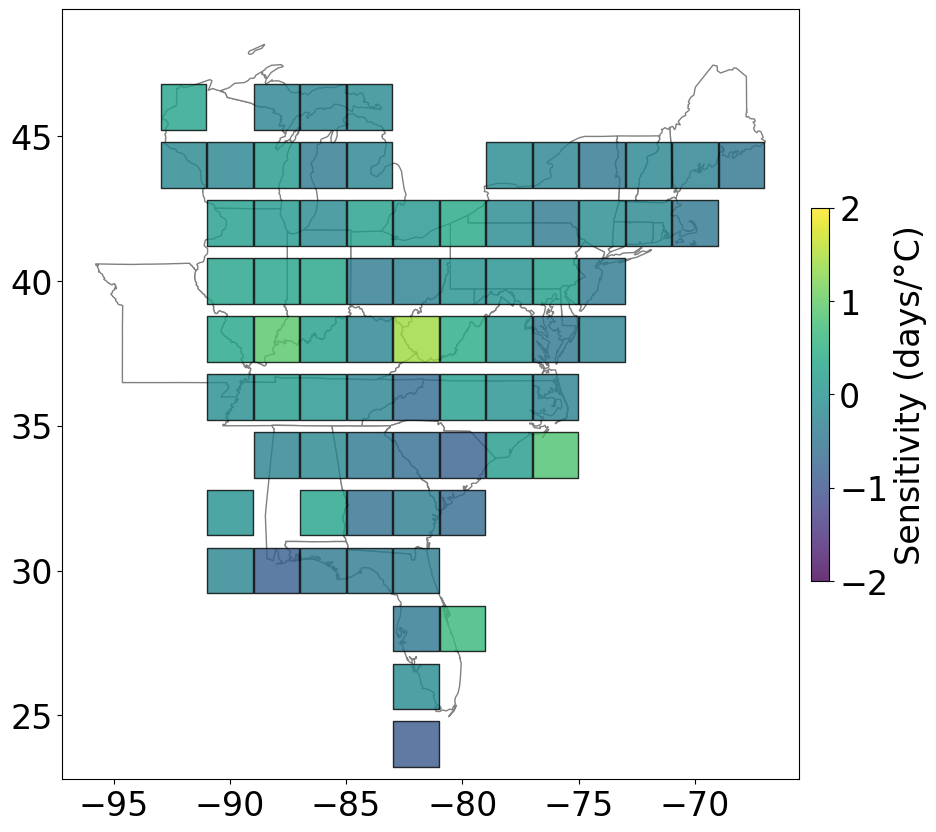

/var/folders/94/vmb3wczd7g1fpr9_16m011tw0000gn/T/ipykernel_2207/2104756220.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_all_species = df_results_all_species.append(df_results_species)


Petrochelidon_pyrrhonota
(388, 19)
(66, 2)
43
55
(326, 19)
(43, 5)
(43, 8)
(43, 5)
(43, 12)
(43, 16)
-0.7159603157007459
0.003165570852372901
0.7200767591873394
4.007146171267115
Progne_subis
(329, 19)
(63, 2)
35
47
(261, 19)
(35, 5)
(35, 8)


/var/folders/94/vmb3wczd7g1fpr9_16m011tw0000gn/T/ipykernel_2207/2104756220.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_all_species = df_results_all_species.append(df_results_species)


(35, 5)
(35, 12)
(35, 16)
0.23549179047854274
7.00564530448089e-05
0.9619395148151615
9.96415502313713
Riparia_riparia
(273, 19)
(47, 2)
29
37
(231, 19)
(29, 5)
(29, 8)


/var/folders/94/vmb3wczd7g1fpr9_16m011tw0000gn/T/ipykernel_2207/2104756220.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_all_species = df_results_all_species.append(df_results_species)


(29, 5)
(29, 12)
(29, 16)
4.85961547802264
0.09041915803770784
0.1129636363328058
6.08628005470613
Stelgidopteryx_serripennis
(720, 19)
(79, 2)
65
71
(688, 19)


/var/folders/94/vmb3wczd7g1fpr9_16m011tw0000gn/T/ipykernel_2207/2104756220.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_all_species = df_results_all_species.append(df_results_species)


(65, 5)
(65, 8)
(65, 5)
(65, 12)
(65, 16)
-10.173607143239956
0.3864807840214495
3.2623213692088696e-08
3.2271884008757503
Tachycineta_bicolor
(676, 19)
(66, 2)
54
58
(646, 19)


/var/folders/94/vmb3wczd7g1fpr9_16m011tw0000gn/T/ipykernel_2207/2104756220.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_all_species = df_results_all_species.append(df_results_species)


(54, 5)
(54, 8)
(54, 5)
(54, 12)
(54, 16)
1.5303796147691284
0.007749492442589934
0.5267410174203142
4.81883962802149


/var/folders/94/vmb3wczd7g1fpr9_16m011tw0000gn/T/ipykernel_2207/2104756220.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_all_species = df_results_all_species.append(df_results_species)


In [35]:
df_results_all_species = pd.DataFrame()

list_slopes_lat = []

list_slopes_temp_change = []
list_r_squared_temp_change = []
list_p_values_temp_change = []
list_err_temp_change = []

list_slopes_temp_change_all_years = []
list_r_squared_temp_change_all_years = []
list_p_values_temp_change_all_years = []
list_err_temp_change_all_years = []

for species in list_sci_names:

    print(species)

    df_results_species, slope_lat, slope_temp_change, r_squared_temp_change, p_value_temp_change, err_temp_change, \
    slope_temp_change_all_years, r_squared_temp_change_all_years, p_value_temp_change_all_years, \
    err_temp_change_all_years = name_of_function(
        species, predictor_variable)

    df_results_all_species = df_results_all_species.append(df_results_species)
    
    list_slopes_lat.append(slope_lat)
    
    list_slopes_temp_change.append(slope_temp_change)
    list_r_squared_temp_change.append(r_squared_temp_change)
    list_p_values_temp_change.append(p_value_temp_change)
    list_err_temp_change.append(err_temp_change)
    
    list_slopes_temp_change_all_years.append(slope_temp_change_all_years)
    list_r_squared_temp_change_all_years.append(r_squared_temp_change_all_years)
    list_p_values_temp_change_all_years.append(p_value_temp_change_all_years)
    list_err_temp_change_all_years.append(err_temp_change_all_years)

In [36]:
df_results_all_species['scientific_name'] = df_results_all_species['scientific_name'].str.replace('_', ' ')
print(df_results_all_species.shape)

df_results_all_species.head(2)

(450, 16)


,cell,slope,intercept,r_squared,p_value,lat,lon,scientific_name,slope_temp_change,intercept_temp_change,r_squared_temp_change,p_value_temp_change,slope_temp_change_all_years,intercept_temp_change_all_years,r_squared_temp_change_all_years,p_value_temp_change_all_years
0,19,-3.208961,123.578219,0.526652,0.064863,26.0,-82.0,Antrostomus carolinensis,0.352385,-694.777228,0.343362,0.166811,0.060397,-106.612850,0.055373,0.347229
1,45,-0.671713,102.003626,0.042864,0.693882,30.0,-86.0,Antrostomus carolinensis,0.303084,-600.626366,0.526948,0.102391,0.094084,-179.479664,0.163271,0.096304


In [37]:
# Compare

print(os.getcwd())

df_results_all_species.to_csv('aerial_insectivores_coefficients_ols.csv', index=False)

/Users/alvastrand/Downloads/states_21basic


In [36]:
df_slopes_lat = pd.DataFrame(data={'scientific_name': list_sci_names, 'slope': list_slopes_lat})

df_slopes_lat['scientific_name'] = df_slopes_lat['scientific_name'].str.replace('_', ' ')

print(df_slopes_lat.shape)

# df_slopes_lat.head(2)

(10, 2)


In [37]:
df_slopes_temp_change = pd.DataFrame(data={'scientific_name': list_sci_names, 'slope': list_slopes_temp_change, 
                                           'r_squared': list_r_squared_temp_change, 
                                           'p_value': list_p_values_temp_change, 
                                           'err': list_err_temp_change})

df_slopes_temp_change['scientific_name'] = df_slopes_temp_change['scientific_name'].str.replace('_', ' ')

print(df_slopes_temp_change.shape)

df_slopes_temp_change

(10, 5)


,scientific_name,slope,r_squared,p_value,err
0,Antrostomus carolinensis,-0.579356,0.018487,5.567523e-01,2.026995
1,Antrostomus vociferus,-0.149709,0.015894,5.572029e-01,0.520862
2,Chaetura pelagica,-1.107848,0.122224,3.011528e-03,0.718432
3,Chordeiles minor,0.779488,0.255486,1.663588e-03,0.463766
4,Hirundo rustica,-0.042169,0.000302,8.839997e-01,0.574226
5,Petrochelidon pyrrhonota,-0.009445,0.000035,9.699353e-01,0.503031
6,Progne subis,0.855388,0.082482,9.436265e-02,1.010405
7,Riparia riparia,0.746691,0.125999,5.882334e-02,0.776555
8,Stelgidopteryx serripennis,-2.169370,0.378158,5.037928e-08,0.700384
9,Tachycineta bicolor,-0.840445,0.073799,4.691020e-02,0.828528


In [38]:
df_slopes_temp_change_all_years = pd.DataFrame(data={'scientific_name': list_sci_names, 
                                                     'slope': list_slopes_temp_change_all_years, 
                                                     'r_squared': list_r_squared_temp_change_all_years, 
                                                     'p_value': list_p_values_temp_change_all_years, 
                                                     'err': list_err_temp_change_all_years})

df_slopes_temp_change_all_years['scientific_name'] = df_slopes_temp_change_all_years['scientific_name'].str.replace('_', ' ')

print(df_slopes_temp_change_all_years.shape)

df_slopes_temp_change_all_years

(10, 5)


,scientific_name,slope,r_squared,p_value,err
0,Antrostomus carolinensis,-16.031375,0.199691,4.226458e-02,15.410537
1,Antrostomus vociferus,-5.195166,0.184057,3.644355e-02,4.836424
2,Chaetura pelagica,-2.577382,0.060945,3.937186e-02,2.448197
3,Chordeiles minor,-2.299443,0.041555,2.330622e-01,3.848855
4,Hirundo rustica,-2.620527,0.064034,3.077114e-02,2.370820
5,Petrochelidon pyrrhonota,-0.715960,0.003166,7.200768e-01,4.007146
6,Progne subis,0.235492,0.000070,9.619395e-01,9.964155
7,Riparia riparia,4.859615,0.090419,1.129636e-01,6.086280
8,Stelgidopteryx serripennis,-10.173607,0.386481,3.262321e-08,3.227188
9,Tachycineta bicolor,1.530380,0.007749,5.267410e-01,4.818840


In [20]:
os.getcwd()

'/Users/alvastrand/Library/Mobile Documents/com~apple~CloudDocs/Documents/OU/Research/data/output'

In [21]:
path = '/Users/alvastrand/Library/Mobile Documents/com~apple~CloudDocs/Documents/OU/Research/data/output/'

os.chdir(path)

In [22]:
os.getcwd()

'/Users/alvastrand/Library/Mobile Documents/com~apple~CloudDocs/Documents/OU/Research/data/output'

In [23]:
filename = 'aerial_insectivores_migration_distances_mean_weighted_body_masses.csv'

df_masses_dist = pd.read_csv(filename)
print(df_masses_dist.shape)

df_masses_dist.head(2)

(19, 26)


,scientific_name,LON.b,LAT.b,LON.nb,LAT.nb,MAX.LAT.nb,distance,intersect,id,avibase id,rank,common_name,french_name,order,family,subfamily,genus,annotation,status_accidental,status_hawaiian,status_introduced,status_nonbreeding,status_extinct,status_misplaced,order_birds_of_north_america,body_mass
0,Aeronautes saxatalis,-108.698701,32.448050,-105.931063,26.265097,39.513228,736.046352,0.586364,755,B401C2DDB3ED732D,species,White-throated Swift,Martinet à gorge blanche,Apodiformes,Apodidae,Apodinae,Aeronautes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Caprimulgiformes,32.1
1,Antrostomus carolinensis,-88.058904,34.063816,-83.140011,16.459749,30.354784,2011.374172,0.049623,718,8D3E887123F5C670,species,Chuck-will's-widow,Engoulevent de Caroline,Caprimulgiformes,Caprimulgidae,Caprimulginae,Antrostomus,Monotypic.,NaN,NaN,NaN,NaN,NaN,NaN,Caprimulgiformes,109.0


In [24]:
df_masses_dist = df_masses_dist[['scientific_name', 'common_name', 'body_mass', 'distance']]
print(df_masses_dist.shape)

df_masses_dist.head(2)

(19, 4)


,scientific_name,common_name,body_mass,distance
0,Aeronautes saxatalis,White-throated Swift,32.1,736.046352
1,Antrostomus carolinensis,Chuck-will's-widow,109.0,2011.374172


In [40]:
# 06/27/2023

df_dist = df_masses_dist[['scientific_name', 'common_name', 'distance']]
print(df_dist.shape)

df_dist.head(2)

(19, 3)


,scientific_name,common_name,distance
0,Aeronautes saxatalis,White-throated Swift,736.046352
1,Antrostomus carolinensis,Chuck-will's-widow,2011.374172


In [41]:
df_dist['scientific_name'] = df_dist['scientific_name'].replace(' ', '_', regex=True)
print(df_dist.shape)

df_dist.head(2)

(19, 3)


/Users/alvastrand/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,scientific_name,common_name,distance
0,Aeronautes_saxatalis,White-throated Swift,736.046352
1,Antrostomus_carolinensis,Chuck-will's-widow,2011.374172


In [42]:
df_dist = df_dist.rename(columns={'scientific_name': 'species'})
print(df_dist.shape)

df_dist.head(2)

(19, 3)


,species,common_name,distance
0,Aeronautes_saxatalis,White-throated Swift,736.046352
1,Antrostomus_carolinensis,Chuck-will's-widow,2011.374172


In [43]:
df_merged_dist = df_merged[['species', 'cell', 'lat', 'lon', 'year', 'arr_IAR_mean', 'air_temp_degrees_celsius']].merge(
    df_dist, on='species')
print(df_merged_dist.shape)

df_merged_dist.head(2)

(4724, 9)


,species,cell,lat,lon,year,arr_IAR_mean,air_temp_degrees_celsius,common_name,distance
0,Hirundo_rustica,5,24,-82,2010,83.163503,17.591547,Barn Swallow,7363.729821
1,Hirundo_rustica,5,24,-82,2012,82.674423,20.578819,Barn Swallow,7363.729821


In [44]:
df_merged_dist = df_merged_dist.rename(columns={'species': 'scientific_name', 'arr_IAR_mean': 'mean_arrival_day'})

df_merged_dist = df_merged_dist[['scientific_name', 'common_name', 'distance', 'cell', 'lat', 'lon', 'year', 'air_temp_degrees_celsius', 'mean_arrival_day']]

print(df_merged_dist.shape)

df_merged_dist.head(2)

(4724, 9)


,scientific_name,common_name,distance,cell,lat,lon,year,air_temp_degrees_celsius,mean_arrival_day
0,Hirundo_rustica,Barn Swallow,7363.729821,5,24,-82,2010,17.591547,83.163503
1,Hirundo_rustica,Barn Swallow,7363.729821,5,24,-82,2012,20.578819,82.674423


In [46]:
df_merged_dist.to_csv('aerial_insectivores_migration_distances_mean_arrival_days_temperatures_20230627.csv', index=False)

In [44]:
df_masses_dist_speeds_means = df_masses_dist.merge(df_speeds_means, on='scientific_name')
print(df_masses_dist_speeds_means.shape)

df_masses_dist_speeds_means.head(2)

(10, 6)


,scientific_name,common_name,body_mass,distance,beta_gamma_mean,mean_arrival_day
0,Antrostomus carolinensis,Chuck-will's-widow,109.0,2011.374172,3.501294,108.002908
1,Antrostomus vociferus,Eastern Whip-poor-will,53.4,2656.170598,3.464462,114.550493


In [45]:
list(df_masses_dist_speeds_means['common_name'])

["Chuck-will's-widow",
 'Eastern Whip-poor-will',
 'Chimney Swift',
 'Common Nighthawk',
 'Barn Swallow',
 'Cliff Swallow',
 'Purple Martin',
 'Bank Swallow',
 'Northern Rough-winged Swallow',
 'Tree Swallow']

In [46]:
list_species_codes = ['CWWI', 'EWPW', 'CHSW', 'CONI', 'BARS', 'CLSW', 'PUMA', 'BANS', 'NRWS', 'TRES']
print(len(list_species_codes))

10


In [47]:
df_masses_dist_speeds_means['species_code'] = list_species_codes
print(df_masses_dist_speeds_means.shape)

df_masses_dist_speeds_means.head(2)

(10, 7)


,scientific_name,common_name,body_mass,distance,beta_gamma_mean,mean_arrival_day,species_code
0,Antrostomus carolinensis,Chuck-will's-widow,109.0,2011.374172,3.501294,108.002908,CWWI
1,Antrostomus vociferus,Eastern Whip-poor-will,53.4,2656.170598,3.464462,114.550493,EWPW


In [48]:
stats.pearsonr(df_masses_dist_speeds_means['body_mass'], df_masses_dist_speeds_means['mean_arrival_day'])

(0.2757203666774137, 0.44065973409960224)

In [49]:
stats.pearsonr(df_masses_dist_speeds_means['body_mass'], df_masses_dist_speeds_means['distance'])

(-0.2794290144143322, 0.4342815019116562)

In [50]:
stats.pearsonr(df_masses_dist_speeds_means['body_mass'], df_masses_dist_speeds_means['beta_gamma_mean'])

(0.3753810220421637, 0.28510790892610205)

In [51]:
stats.pearsonr(df_masses_dist_speeds_means['mean_arrival_day'], df_masses_dist_speeds_means['distance'])

(0.40441804883699983, 0.24638000729883044)

In [52]:
stats.pearsonr(df_masses_dist_speeds_means['mean_arrival_day'], df_masses_dist_speeds_means['beta_gamma_mean'])

(-0.5611269320406072, 0.09147860454152686)

In [53]:
stats.pearsonr(df_masses_dist_speeds_means['distance'], df_masses_dist_speeds_means['beta_gamma_mean'])

(-0.7083110763206211, 0.021876284342407397)

In [54]:
def make_plot(df):

    df_results_all_species_masses_dist = df.merge(df_masses_dist, on='scientific_name')

    df_results_all_species_masses_dist['body_mass_mg'] = df_results_all_species_masses_dist['body_mass']*1000

    df_results_all_species_masses_dist['log_body_mass_mg'] = np.log(
        df_results_all_species_masses_dist['body_mass_mg'])

    color_values = matplotlib.cm.rainbow(
        np.linspace(0, 1, len(df_results_all_species_masses_dist['common_name'].unique())))

    colors = dict(zip(df_results_all_species_masses_dist['common_name'].unique(), color_values))

    field_name = 'log_body_mass_mg'

#     field_name = 'distance'

    fig, ax = plt.subplots()

    for species in list(df_results_all_species_masses_dist['common_name'].unique()):

        df_subset = df_results_all_species_masses_dist[df_results_all_species_masses_dist['common_name'] == species]

        df_subset.plot(ax=ax, kind='scatter', x=field_name, y='slope', label=species, 
                       color=colors[species], figsize=(10,10), s=50)

    plt.rc('font', size=24)
    plt.rc('axes', titlesize=24)
    plt.rc('axes', labelsize=24)
    plt.rc('xtick', labelsize=24)
    plt.rc('ytick', labelsize=24)
    plt.rc('legend', fontsize=11)

    plt.legend(loc='best')

    plt.axhline(y=0, color='grey', linestyle='--')

    if field_name == 'log_body_mass_mg':

        plt.xlabel('Natural logarithm of body mass (mg)')
    
    plt.ylabel('Sensitivity (days/°C)')
    
#     plt.savefig('sensitivity_body_mass_20220621.pdf', bbox_inches='tight')

    plt.show()
    
    return df_results_all_species_masses_dist

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

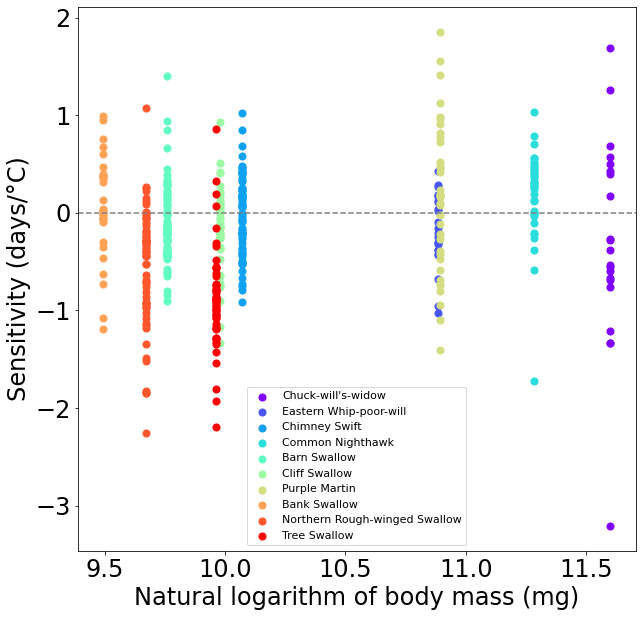

(450, 22)


,cell,slope,intercept,r_squared,p_value,lat,lon,scientific_name,slope_temp_change,intercept_temp_change,r_squared_temp_change,p_value_temp_change,slope_temp_change_all_years,intercept_temp_change_all_years,r_squared_temp_change_all_years,p_value_temp_change_all_years,geometry,common_name,body_mass,distance,body_mass_mg,log_body_mass_mg
0,19,-3.208961,123.578219,0.526652,0.064863,26.0,-82.0,Antrostomus carolinensis,0.352385,-694.777228,0.343362,0.166811,0.060397,-106.612850,0.055373,0.347229,NaN,Chuck-will's-widow,109.0,2011.374172,109000.0,11.599103
1,45,-0.671713,102.003626,0.042864,0.693882,30.0,-86.0,Antrostomus carolinensis,0.303084,-600.626366,0.526948,0.102391,0.094084,-179.479664,0.163271,0.096304,NaN,Chuck-will's-widow,109.0,2011.374172,109000.0,11.599103


In [55]:
df_results_all_species_masses_dist = make_plot(df_results_all_species)
print(df_results_all_species_masses_dist.shape)

df_results_all_species_masses_dist.head(2)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

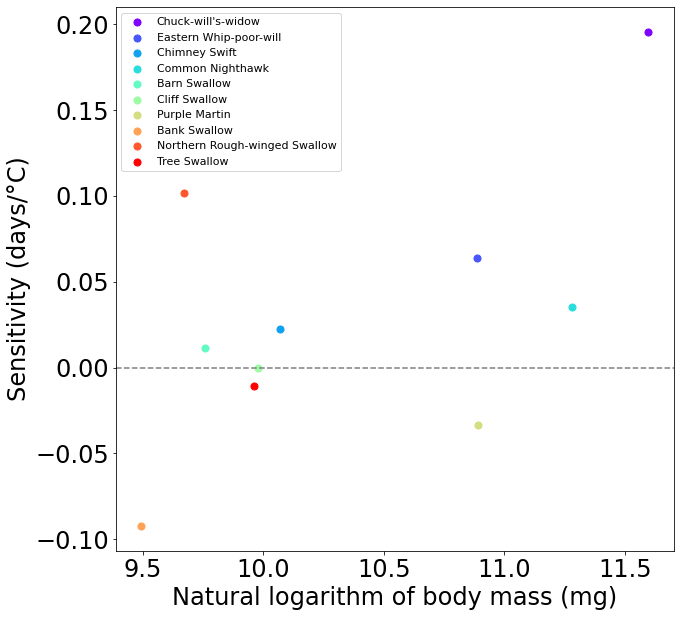

(10, 7)


,scientific_name,slope,common_name,body_mass,distance,body_mass_mg,log_body_mass_mg
0,Antrostomus carolinensis,0.195556,Chuck-will's-widow,109.0,2011.374172,109000.0,11.599103
1,Antrostomus vociferus,0.063601,Eastern Whip-poor-will,53.4,2656.170598,53400.0,10.885566


In [56]:
df_slopes_lat_masses_dist = make_plot(df_slopes_lat)
print(df_slopes_lat_masses_dist.shape)

df_slopes_lat_masses_dist.head(2)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

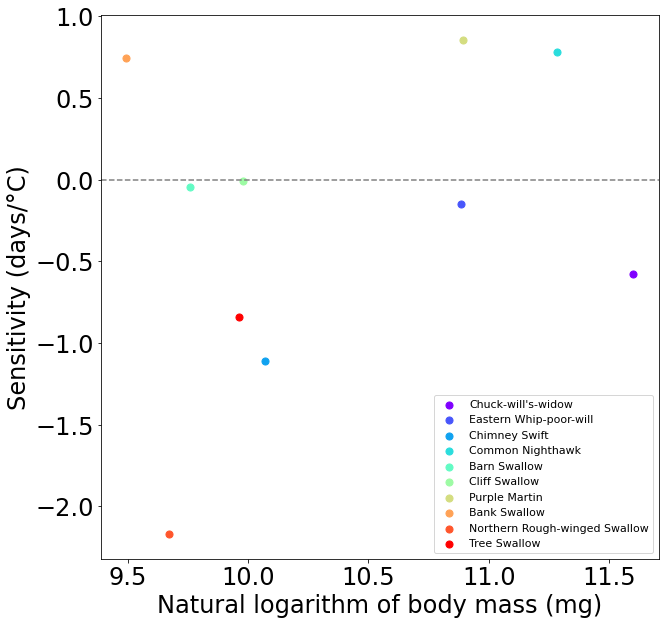

(10, 10)


,scientific_name,slope,r_squared,p_value,err,common_name,body_mass,distance,body_mass_mg,log_body_mass_mg
0,Antrostomus carolinensis,-0.579356,0.018487,0.556752,2.026995,Chuck-will's-widow,109.0,2011.374172,109000.0,11.599103
1,Antrostomus vociferus,-0.149709,0.015894,0.557203,0.520862,Eastern Whip-poor-will,53.4,2656.170598,53400.0,10.885566


In [57]:
df_slopes_temp_change_masses_dist = make_plot(df_slopes_temp_change)
print(df_slopes_temp_change_masses_dist.shape)

df_slopes_temp_change_masses_dist.head(2)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

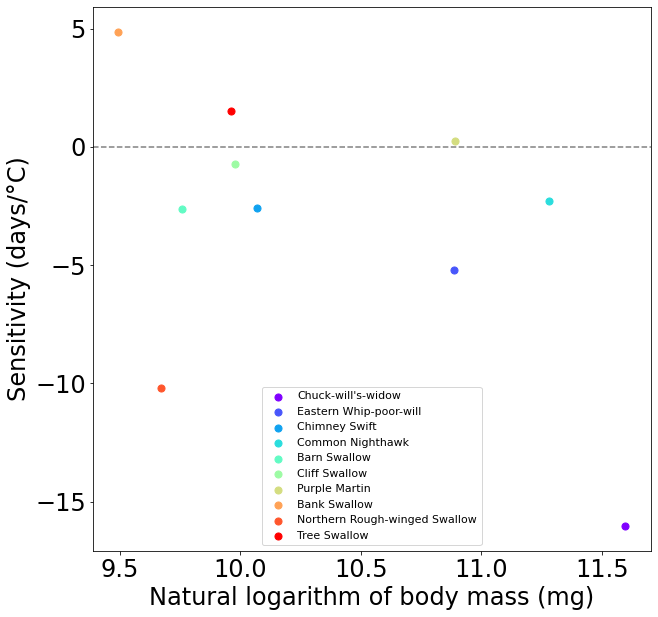

(10, 10)


,scientific_name,slope,r_squared,p_value,err,common_name,body_mass,distance,body_mass_mg,log_body_mass_mg
0,Antrostomus carolinensis,-16.031375,0.199691,0.042265,15.410537,Chuck-will's-widow,109.0,2011.374172,109000.0,11.599103
1,Antrostomus vociferus,-5.195166,0.184057,0.036444,4.836424,Eastern Whip-poor-will,53.4,2656.170598,53400.0,10.885566


In [58]:
df_slopes_temp_change_all_years_masses_dist = make_plot(df_slopes_temp_change_all_years)
print(df_slopes_temp_change_all_years_masses_dist.shape)

df_slopes_temp_change_all_years_masses_dist.head(2)

                            OLS Regression Results                            
Dep. Variable:                  slope   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     12.97
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           0.000353
Time:                        00:52:47   Log-Likelihood:                -422.22
No. Observations:                 450   AIC:                             848.4
Df Residuals:                     448   BIC:                             856.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3434      0.048     -7.219      0.0

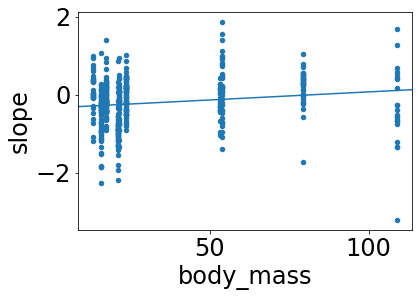

In [59]:
model_ols = smf.ols(formula='slope ~ body_mass', data=df_results_all_species_masses_dist)

res_ols = model_ols.fit()

print(res_ols.summary())

ax = df_results_all_species_masses_dist.plot.scatter(x='body_mass', y='slope')

abline_plot(model_results=res_ols, ax=ax)

plt.show()

In [60]:
# model_ols = smf.ols(formula='slope ~ log_body_mass_mg', data=df_results_all_species_masses_dist)

# res_ols = model_ols.fit()

# print(res_ols.summary())

# ax = df_results_all_species_masses_dist.plot.scatter(x='log_body_mass_mg', y='slope')

# abline_plot(model_results=res_ols, ax=ax)

# plt.show()

In [61]:
model_ols = smf.ols(formula='slope ~ body_mass + distance', data=df_results_all_species_masses_dist)

res_ols = model_ols.fit()

print(res_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  slope   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     44.73
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           1.96e-18
Time:                        00:52:47   Log-Likelihood:                -387.59
No. Observations:                 450   AIC:                             781.2
Df Residuals:                     447   BIC:                             793.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8842      0.077    -11.534      0.0

In [62]:
# model_ols = smf.ols(formula='slope ~ body_mass * distance', data=df_results_all_species_masses_dist)

# res_ols = model_ols.fit()

# print(res_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  slope   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     5.473
Date:                Mon, 17 Apr 2023   Prob (F-statistic):             0.0475
Time:                        00:52:47   Log-Likelihood:                 14.365
No. Observations:                  10   AIC:                            -24.73
Df Residuals:                       8   BIC:                            -24.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0340      0.034     -1.005      0.3

/Users/alvastrand/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


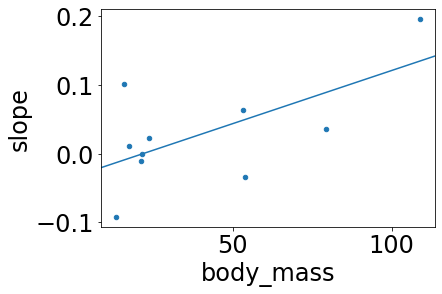

In [63]:
model_ols = smf.ols(formula='slope ~ body_mass', data=df_slopes_lat_masses_dist)

res_ols = model_ols.fit()

print(res_ols.summary())

ax = df_slopes_lat_masses_dist.plot.scatter(x='body_mass', y='slope')

abline_plot(model_results=res_ols, ax=ax)

plt.show()

In [64]:
# model_ols = smf.ols(formula='slope ~ log_body_mass_mg', data=df_slopes_lat_masses_dist)

# res_ols = model_ols.fit()

# print(res_ols.summary())

# ax = df_slopes_lat_masses_dist.plot.scatter(x='log_body_mass_mg', y='slope')

# abline_plot(model_results=res_ols, ax=ax)

# plt.show()

In [65]:
# model_ols = smf.ols(formula='slope ~ body_mass + distance', data=df_slopes_lat_masses_dist)

# res_ols = model_ols.fit()

# print(res_ols.summary())

In [66]:
# model_ols = smf.ols(formula='slope ~ body_mass * distance', data=df_slopes_lat_masses_dist)

# res_ols = model_ols.fit()

# print(res_ols.summary())

In [67]:
df_results_all_species_masses_dist_speeds_means = df_results_all_species_masses_dist.merge(
    df_speeds_means, on='scientific_name')
print(df_results_all_species_masses_dist_speeds_means.shape)

df_results_all_species_masses_dist_speeds_means.head(2)

(450, 24)


,cell,slope,intercept,r_squared,p_value,lat,lon,scientific_name,slope_temp_change,intercept_temp_change,r_squared_temp_change,p_value_temp_change,slope_temp_change_all_years,intercept_temp_change_all_years,r_squared_temp_change_all_years,p_value_temp_change_all_years,geometry,common_name,body_mass,distance,body_mass_mg,log_body_mass_mg,beta_gamma_mean,mean_arrival_day
0,19,-3.208961,123.578219,0.526652,0.064863,26.0,-82.0,Antrostomus carolinensis,0.352385,-694.777228,0.343362,0.166811,0.060397,-106.612850,0.055373,0.347229,NaN,Chuck-will's-widow,109.0,2011.374172,109000.0,11.599103,3.501294,108.002908
1,45,-0.671713,102.003626,0.042864,0.693882,30.0,-86.0,Antrostomus carolinensis,0.303084,-600.626366,0.526948,0.102391,0.094084,-179.479664,0.163271,0.096304,NaN,Chuck-will's-widow,109.0,2011.374172,109000.0,11.599103,3.501294,108.002908


                            OLS Regression Results                            
Dep. Variable:                  slope   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     90.47
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           1.16e-19
Time:                        00:52:47   Log-Likelihood:                -387.25
No. Observations:                 450   AIC:                             778.5
Df Residuals:                     448   BIC:                             786.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -3.1568      0.311  

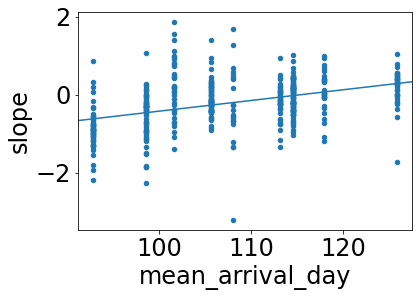

In [68]:
model_ols = smf.ols(formula='slope ~ mean_arrival_day', data=df_results_all_species_masses_dist_speeds_means)

res_ols = model_ols.fit()

print(res_ols.summary())

ax = df_results_all_species_masses_dist_speeds_means.plot.scatter(x='mean_arrival_day', y='slope')

abline_plot(model_results=res_ols, ax=ax)

plt.show()

                            OLS Regression Results                            
Dep. Variable:                  slope   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     65.73
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           4.99e-15
Time:                        00:52:47   Log-Likelihood:                -397.84
No. Observations:                 450   AIC:                             799.7
Df Residuals:                     448   BIC:                             807.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7030      0.067    -10.491      0.0

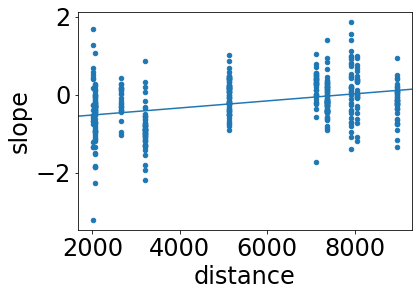

In [69]:
model_ols = smf.ols(formula='slope ~ distance', data=df_results_all_species_masses_dist_speeds_means)

res_ols = model_ols.fit()

print(res_ols.summary())

ax = df_results_all_species_masses_dist_speeds_means.plot.scatter(x='distance', y='slope')

abline_plot(model_results=res_ols, ax=ax)

plt.show()

                            OLS Regression Results                            
Dep. Variable:                  slope   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     57.60
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           1.88e-13
Time:                        00:52:48   Log-Likelihood:                -401.43
No. Observations:                 450   AIC:                             806.9
Df Residuals:                     448   BIC:                             815.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.5267      0.101     

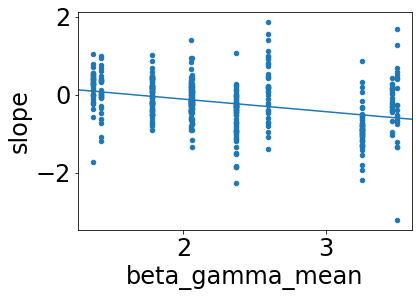

In [70]:
model_ols = smf.ols(formula='slope ~ beta_gamma_mean', data=df_results_all_species_masses_dist_speeds_means)

res_ols = model_ols.fit()

print(res_ols.summary())

ax = df_results_all_species_masses_dist_speeds_means.plot.scatter(x='beta_gamma_mean', y='slope')

abline_plot(model_results=res_ols, ax=ax)

plt.show()

In [71]:
model_ols = smf.ols(formula='slope ~  body_mass + beta_gamma_mean', 
                    data=df_results_all_species_masses_dist_speeds_means)

res_ols = model_ols.fit()

print(res_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  slope   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     47.96
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           1.35e-19
Time:                        00:52:48   Log-Likelihood:                -384.90
No. Observations:                 450   AIC:                             775.8
Df Residuals:                     447   BIC:                             788.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.4460      0.098     

In [72]:
# model_ols = smf.ols(formula='slope ~  body_mass * beta_gamma_mean', 
#                     data=df_results_all_species_masses_dist_speeds_means)

# res_ols = model_ols.fit()

# print(res_ols.summary())

In [73]:
model_ols = smf.ols(formula='slope ~  body_mass + mean_arrival_day', 
                    data=df_results_all_species_masses_dist_speeds_means)

res_ols = model_ols.fit()

print(res_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  slope   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     45.28
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           1.24e-18
Time:                        00:52:48   Log-Likelihood:                -387.14
No. Observations:                 450   AIC:                             780.3
Df Residuals:                     447   BIC:                             792.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -3.1164      0.322  

In [74]:
# model_ols = smf.ols(formula='slope ~  body_mass * mean_arrival_day', 
#                     data=df_results_all_species_masses_dist_speeds_means)

# res_ols = model_ols.fit()

# print(res_ols.summary())

In [75]:
def run_ols_regression(df, predictor_variable):

    model_ols = smf.ols(formula='slope ~ ' + predictor_variable, data=df)

    res_ols = model_ols.fit()

    print(res_ols.summary())

    ax = df.plot.scatter(x=predictor_variable, y='slope')

    abline_plot(model_results=res_ols, ax=ax)

    plt.show()

In [76]:
def model_contribution_traits(df_slopes_masses_dist):

    df_slopes_masses_dist_speeds_means = df_slopes_masses_dist.merge(
        df_speeds_means, on='scientific_name')
    print(df_slopes_masses_dist_speeds_means.shape)

    df_slopes_masses_dist_speeds_means.head(2)
    
    predictor_variable = 'body_mass'

    run_ols_regression(df_slopes_masses_dist_speeds_means, predictor_variable)

    predictor_variable = 'distance'

    run_ols_regression(df_slopes_masses_dist_speeds_means, predictor_variable)

    predictor_variable = 'beta_gamma_mean'

    run_ols_regression(df_slopes_masses_dist_speeds_means, predictor_variable)

    predictor_variable = 'mean_arrival_day'

    run_ols_regression(df_slopes_masses_dist_speeds_means, predictor_variable)
    
    return df_slopes_masses_dist_speeds_means

(10, 9)
                            OLS Regression Results                            
Dep. Variable:                  slope   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     5.473
Date:                Mon, 17 Apr 2023   Prob (F-statistic):             0.0475
Time:                        00:52:48   Log-Likelihood:                 14.365
No. Observations:                  10   AIC:                            -24.73
Df Residuals:                       8   BIC:                            -24.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0340      0.034     -1.005 

/Users/alvastrand/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


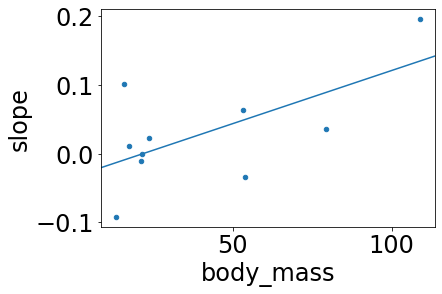

                            OLS Regression Results                            
Dep. Variable:                  slope   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     9.159
Date:                Mon, 17 Apr 2023   Prob (F-statistic):             0.0164
Time:                        00:52:48   Log-Likelihood:                 15.574
No. Observations:                  10   AIC:                            -27.15
Df Residuals:                       8   BIC:                            -26.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1432      0.042      3.430      0.0

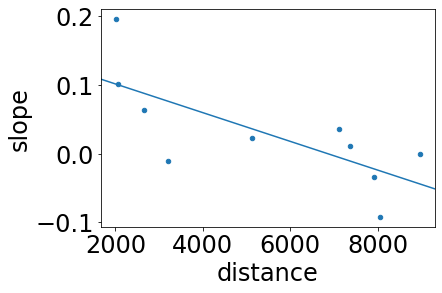

                            OLS Regression Results                            
Dep. Variable:                  slope   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     3.242
Date:                Mon, 17 Apr 2023   Prob (F-statistic):              0.109
Time:                        00:52:48   Log-Likelihood:                 13.460
No. Observations:                  10   AIC:                            -22.92
Df Residuals:                       8   BIC:                            -22.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.0966      0.073     

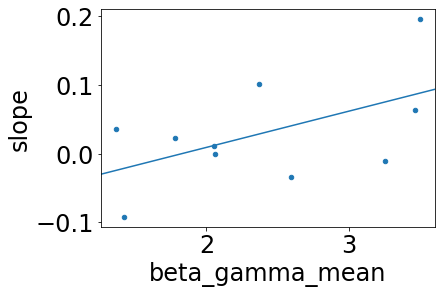

                            OLS Regression Results                            
Dep. Variable:                  slope   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.114
Method:                 Least Squares   F-statistic:                   0.08027
Date:                Mon, 17 Apr 2023   Prob (F-statistic):              0.784
Time:                        00:52:48   Log-Likelihood:                 11.809
No. Observations:                  10   AIC:                            -19.62
Df Residuals:                       8   BIC:                            -19.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1157      0.306  

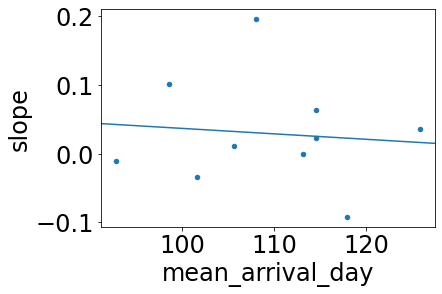

,scientific_name,slope,common_name,body_mass,distance,body_mass_mg,log_body_mass_mg,beta_gamma_mean,mean_arrival_day
0,Antrostomus carolinensis,0.195556,Chuck-will's-widow,109.0,2011.374172,109000.0,11.599103,3.501294,108.002908
1,Antrostomus vociferus,0.063601,Eastern Whip-poor-will,53.4,2656.170598,53400.0,10.885566,3.464462,114.550493


In [77]:
df_slopes_lat_masses_dist_speeds_means = model_contribution_traits(df_slopes_lat_masses_dist)

df_slopes_lat_masses_dist_speeds_means.head(2)

(10, 12)
                            OLS Regression Results                            
Dep. Variable:                  slope   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                 -0.054
Method:                 Least Squares   F-statistic:                    0.5375
Date:                Mon, 17 Apr 2023   Prob (F-statistic):              0.484
Time:                        00:52:48   Log-Likelihood:                -12.910
No. Observations:                  10   AIC:                             29.82
Df Residuals:                       8   BIC:                             30.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5547      0.517     -1.072

/Users/alvastrand/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


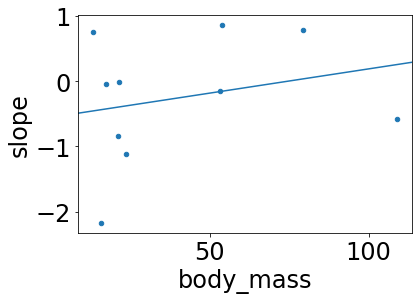

                            OLS Regression Results                            
Dep. Variable:                  slope   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     8.988
Date:                Mon, 17 Apr 2023   Prob (F-statistic):             0.0171
Time:                        00:52:49   Log-Likelihood:                -9.4702
No. Observations:                  10   AIC:                             22.94
Df Residuals:                       8   BIC:                             23.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.6336      0.511     -3.197      0.0

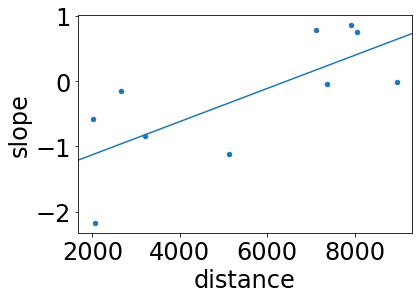

                            OLS Regression Results                            
Dep. Variable:                  slope   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.8559
Date:                Mon, 17 Apr 2023   Prob (F-statistic):              0.382
Time:                        00:52:49   Log-Likelihood:                -12.727
No. Observations:                  10   AIC:                             29.45
Df Residuals:                       8   BIC:                             30.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.6350      1.006     

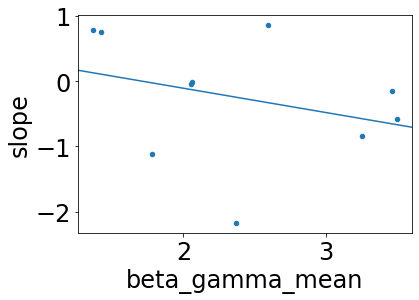

                            OLS Regression Results                            
Dep. Variable:                  slope   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     2.926
Date:                Mon, 17 Apr 2023   Prob (F-statistic):              0.126
Time:                        00:52:49   Log-Likelihood:                -11.677
No. Observations:                  10   AIC:                             27.35
Df Residuals:                       8   BIC:                             27.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -5.7173      3.207  

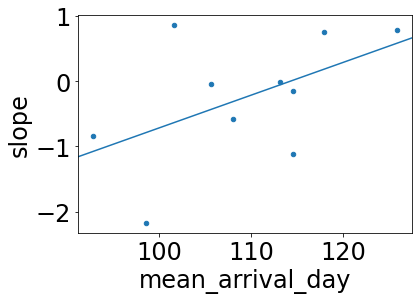

,scientific_name,slope,r_squared,p_value,err,common_name,body_mass,distance,body_mass_mg,log_body_mass_mg,beta_gamma_mean,mean_arrival_day
0,Antrostomus carolinensis,-0.579356,0.018487,0.556752,2.026995,Chuck-will's-widow,109.0,2011.374172,109000.0,11.599103,3.501294,108.002908
1,Antrostomus vociferus,-0.149709,0.015894,0.557203,0.520862,Eastern Whip-poor-will,53.4,2656.170598,53400.0,10.885566,3.464462,114.550493


In [78]:
df_slopes_temp_change_masses_dist_speeds_means = model_contribution_traits(df_slopes_temp_change_masses_dist)

df_slopes_temp_change_masses_dist_speeds_means.head(2)

(10, 12)
                            OLS Regression Results                            
Dep. Variable:                  slope   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     4.290
Date:                Mon, 17 Apr 2023   Prob (F-statistic):             0.0721
Time:                        00:52:49   Log-Likelihood:                -29.433
No. Observations:                  10   AIC:                             62.87
Df Residuals:                       8   BIC:                             63.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1699      2.700      0.433

/Users/alvastrand/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


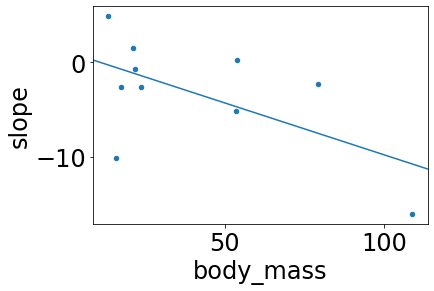

                            OLS Regression Results                            
Dep. Variable:                  slope   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     7.520
Date:                Mon, 17 Apr 2023   Prob (F-statistic):             0.0254
Time:                        00:52:49   Log-Likelihood:                -28.267
No. Observations:                  10   AIC:                             60.53
Df Residuals:                       8   BIC:                             61.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.5796      3.348     -3.459      0.0

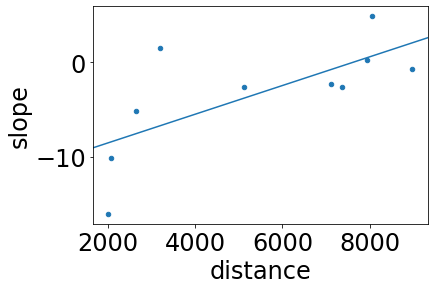

                            OLS Regression Results                            
Dep. Variable:                  slope   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     2.661
Date:                Mon, 17 Apr 2023   Prob (F-statistic):              0.141
Time:                        00:52:49   Log-Likelihood:                -30.144
No. Observations:                  10   AIC:                             64.29
Df Residuals:                       8   BIC:                             64.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.6243      5.741     

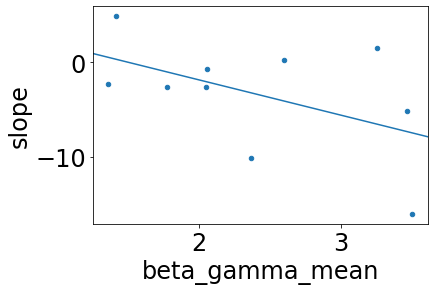

                            OLS Regression Results                            
Dep. Variable:                  slope   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                 -0.105
Method:                 Least Squares   F-statistic:                    0.1452
Date:                Mon, 17 Apr 2023   Prob (F-statistic):              0.713
Time:                        00:52:49   Log-Likelihood:                -31.490
No. Observations:                  10   AIC:                             66.98
Df Residuals:                       8   BIC:                             67.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -12.1302     23.260  

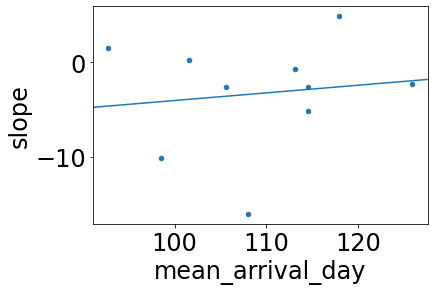

,scientific_name,slope,r_squared,p_value,err,common_name,body_mass,distance,body_mass_mg,log_body_mass_mg,beta_gamma_mean,mean_arrival_day
0,Antrostomus carolinensis,-16.031375,0.199691,0.042265,15.410537,Chuck-will's-widow,109.0,2011.374172,109000.0,11.599103,3.501294,108.002908
1,Antrostomus vociferus,-5.195166,0.184057,0.036444,4.836424,Eastern Whip-poor-will,53.4,2656.170598,53400.0,10.885566,3.464462,114.550493


In [79]:
df_slopes_temp_change_all_years_masses_dist_speeds_means = model_contribution_traits(
    df_slopes_temp_change_all_years_masses_dist)

df_slopes_temp_change_all_years_masses_dist_speeds_means.head(2)

In [80]:
def make_plot_other_traits(df, field_name, y):

    df_results_all_species_masses_dist = df.merge(df_masses_dist_speeds_means, on='scientific_name')

    color_values = matplotlib.cm.tab10(
        np.linspace(0, 1, len(df_results_all_species_masses_dist['species_code'].unique())))

    colors = dict(zip(df_results_all_species_masses_dist['species_code'].unique(), color_values))

    fig, ax = plt.subplots()
    
    if y == 'sensitivity':
        
        marker_size = 50
        
    else:
        
        marker_size = 100
        
    if y == 'sensitivity':

        for species in list(df_results_all_species_masses_dist['species_code'].unique()):

            df_subset = df_results_all_species_masses_dist[df_results_all_species_masses_dist['species_code'] == species]

            df_subset.plot.scatter(ax=ax, x=field_name, y='slope', label=species, 
                       color=colors[species], figsize=(10,10), s=marker_size)
    
    else:
        
        fig, ax = plt.subplots(figsize=(10, 10))

        ax.errorbar(df_results_all_species_masses_dist['distance'], df_results_all_species_masses_dist['slope'], 
                    df_results_all_species_masses_dist['err'], color='none', 
                    ecolor=df_results_all_species_masses_dist['species_code'].map(colors), linewidth=1)

        ax.scatter(df_results_all_species_masses_dist['distance'], df_results_all_species_masses_dist['slope'], 
                   marker='_', linewidth=3, color=df_results_all_species_masses_dist['species_code'].map(colors), 
                   s=1000)

        for species in np.unique(df_results_all_species_masses_dist['species_code']):

            color = colors[species]

            df_subset = df_results_all_species_masses_dist[df_results_all_species_masses_dist['species_code'] == species]

            ax.errorbar(df_subset['distance'], df_subset['slope'], df_subset['err'], color=color, marker='_', ms=30, 
                        linewidth=3, label=species)

    plt.rc('font', size=24)
    plt.rc('axes', titlesize=24)
    plt.rc('axes', labelsize=24)
    plt.rc('xtick', labelsize=24)
    plt.rc('ytick', labelsize=24)

    plt.axhline(y=0, color='grey', linestyle='--')
    
    model_ols = smf.ols(formula='slope ~ ' + field_name, data=df_results_all_species_masses_dist)

    res_ols = model_ols.fit()

    abline_plot(model_results=res_ols, ax=ax, color='black')

    if field_name == 'mean_arrival_day':
        
        plt.rc('legend', fontsize=12)
        
        plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))

        plt.xlabel('Mean arrival day')
        
        plt.ylabel('Sensitivity (days/°C)')
        
    elif field_name == 'distance' and y == 'sensitivity':
        
        plt.rc('legend', fontsize=12)
        
        plt.legend(loc='best')

        plt.xlabel('Migration distance (km)')
        
        plt.ylabel('Sensitivity (days/°C)')
        
    elif field_name == 'beta_gamma_mean' and y == 'sensitivity':
        
        plt.rc('legend', fontsize=12)
        
        plt.legend(loc='best')

        plt.xlabel('Migration speed (days/°latitude)')
        
        plt.ylabel('Sensitivity (days/°C)')
        
    elif field_name == 'distance' and y == 'sensitivity_latitude':
        
        plt.rc('legend', fontsize=20)
        
        plt.legend(loc='best')
        
        plt.xlabel('Migration distance (km)')
        
        plt.ylabel('Change in sensitivity with latitude')
        
    elif field_name == 'distance' and y == 'sensitivity_temp_change':
        
        plt.rc('legend', fontsize=16)
        
        plt.legend(loc='best')
        
        plt.xlabel('Migration distance (km)')
        
        plt.ylabel('Change in sensitivity with air temperature change over time')
        
    plt.savefig('sensitivity_' + y + '_' + field_name + '_20220621.pdf', bbox_inches='tight')

    plt.show()
    
    return df_results_all_species_masses_dist

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

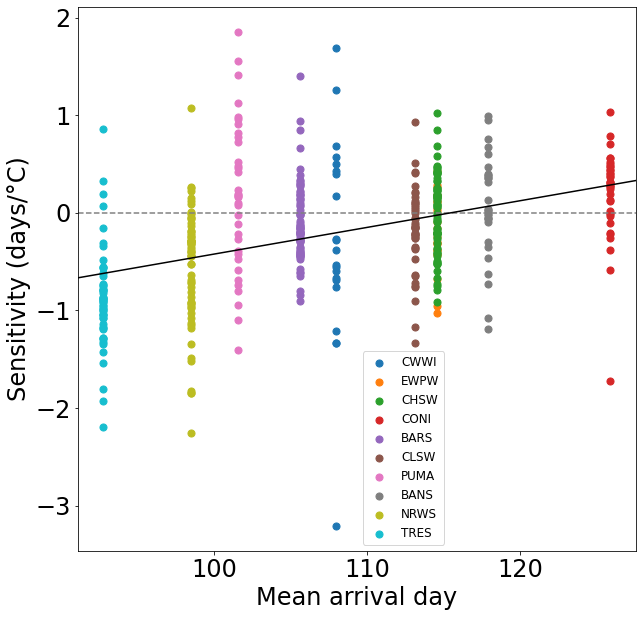

(450, 23)


,cell,slope,intercept,r_squared,p_value,lat,lon,scientific_name,slope_temp_change,intercept_temp_change,r_squared_temp_change,p_value_temp_change,slope_temp_change_all_years,intercept_temp_change_all_years,r_squared_temp_change_all_years,p_value_temp_change_all_years,geometry,common_name,body_mass,distance,beta_gamma_mean,mean_arrival_day,species_code
0,19,-3.208961,123.578219,0.526652,0.064863,26.0,-82.0,Antrostomus carolinensis,0.352385,-694.777228,0.343362,0.166811,0.060397,-106.612850,0.055373,0.347229,NaN,Chuck-will's-widow,109.0,2011.374172,3.501294,108.002908,CWWI
1,45,-0.671713,102.003626,0.042864,0.693882,30.0,-86.0,Antrostomus carolinensis,0.303084,-600.626366,0.526948,0.102391,0.094084,-179.479664,0.163271,0.096304,NaN,Chuck-will's-widow,109.0,2011.374172,3.501294,108.002908,CWWI


In [81]:
df_results_all_species_masses_dist = make_plot_other_traits(df_results_all_species, 'mean_arrival_day', 'sensitivity')
print(df_results_all_species_masses_dist.shape)

df_results_all_species_masses_dist.head(2)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

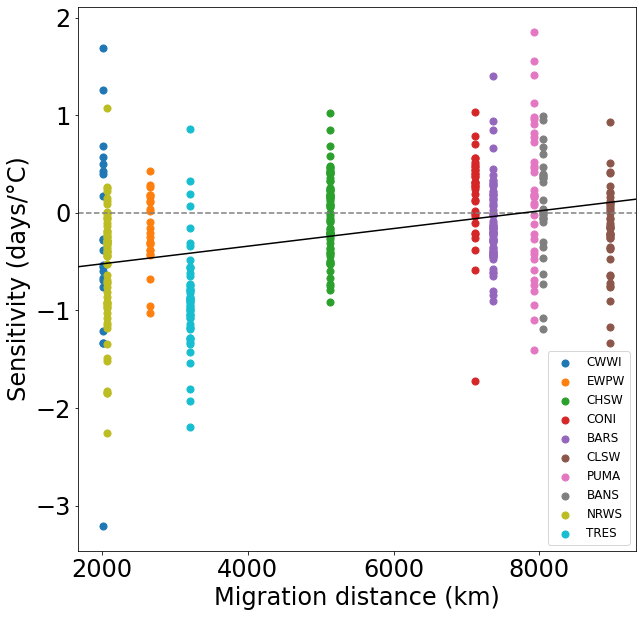

(450, 23)


,cell,slope,intercept,r_squared,p_value,lat,lon,scientific_name,slope_temp_change,intercept_temp_change,r_squared_temp_change,p_value_temp_change,slope_temp_change_all_years,intercept_temp_change_all_years,r_squared_temp_change_all_years,p_value_temp_change_all_years,geometry,common_name,body_mass,distance,beta_gamma_mean,mean_arrival_day,species_code
0,19,-3.208961,123.578219,0.526652,0.064863,26.0,-82.0,Antrostomus carolinensis,0.352385,-694.777228,0.343362,0.166811,0.060397,-106.612850,0.055373,0.347229,NaN,Chuck-will's-widow,109.0,2011.374172,3.501294,108.002908,CWWI
1,45,-0.671713,102.003626,0.042864,0.693882,30.0,-86.0,Antrostomus carolinensis,0.303084,-600.626366,0.526948,0.102391,0.094084,-179.479664,0.163271,0.096304,NaN,Chuck-will's-widow,109.0,2011.374172,3.501294,108.002908,CWWI


In [82]:
df_results_all_species_masses_dist = make_plot_other_traits(df_results_all_species, 'distance', 'sensitivity')
print(df_results_all_species_masses_dist.shape)

df_results_all_species_masses_dist.head(2)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

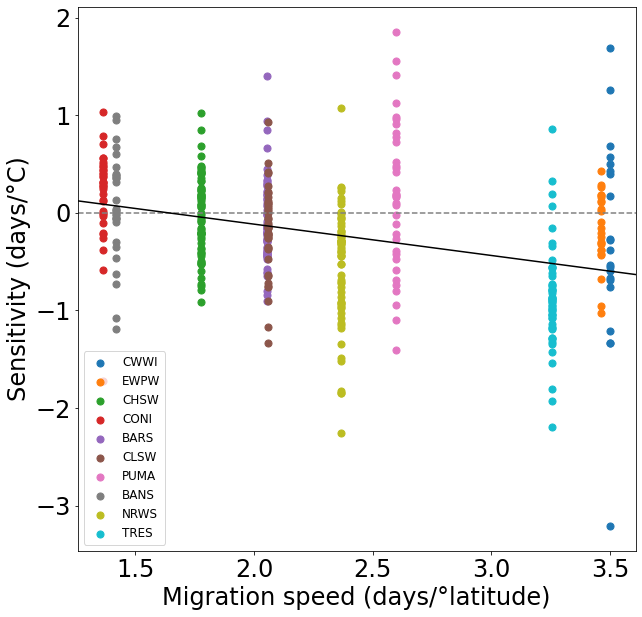

(450, 23)


,cell,slope,intercept,r_squared,p_value,lat,lon,scientific_name,slope_temp_change,intercept_temp_change,r_squared_temp_change,p_value_temp_change,slope_temp_change_all_years,intercept_temp_change_all_years,r_squared_temp_change_all_years,p_value_temp_change_all_years,geometry,common_name,body_mass,distance,beta_gamma_mean,mean_arrival_day,species_code
0,19,-3.208961,123.578219,0.526652,0.064863,26.0,-82.0,Antrostomus carolinensis,0.352385,-694.777228,0.343362,0.166811,0.060397,-106.612850,0.055373,0.347229,NaN,Chuck-will's-widow,109.0,2011.374172,3.501294,108.002908,CWWI
1,45,-0.671713,102.003626,0.042864,0.693882,30.0,-86.0,Antrostomus carolinensis,0.303084,-600.626366,0.526948,0.102391,0.094084,-179.479664,0.163271,0.096304,NaN,Chuck-will's-widow,109.0,2011.374172,3.501294,108.002908,CWWI


In [83]:
df_results_all_species_masses_dist = make_plot_other_traits(df_results_all_species, 'beta_gamma_mean', 'sensitivity')
print(df_results_all_species_masses_dist.shape)

df_results_all_species_masses_dist.head(2)

KeyError: 'err'

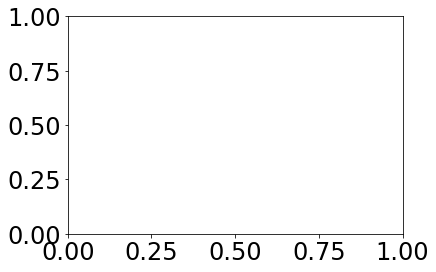

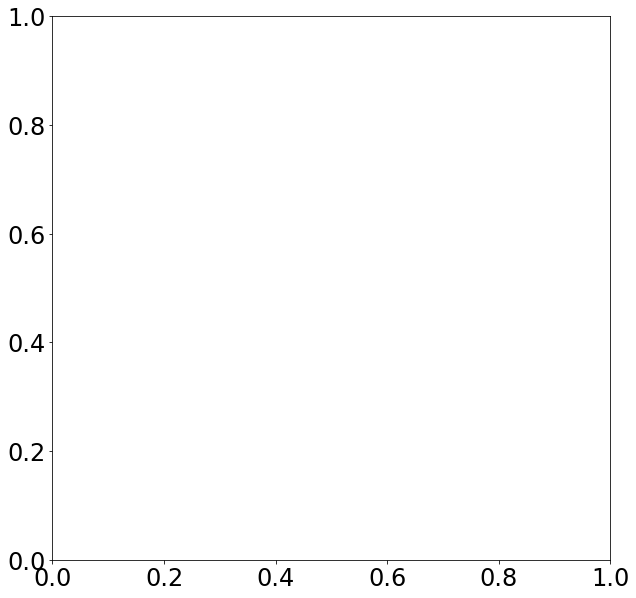

In [84]:
df_slopes_lat_masses_dist = make_plot_other_traits(df_slopes_lat, 'distance', 'sensitivity_latitude')
print(df_slopes_lat_masses_dist.shape)

df_slopes_lat_masses_dist.head(2)

In [ ]:
df_slopes_temp_change_masses_dist_traits = make_plot_other_traits(
    df_slopes_temp_change, 'distance', 'sensitivity_temp_change')
print(df_slopes_temp_change_masses_dist_traits.shape)

df_slopes_temp_change_masses_dist_traits.head(2)

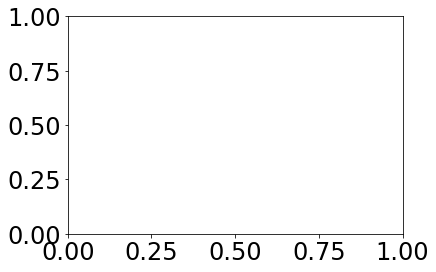

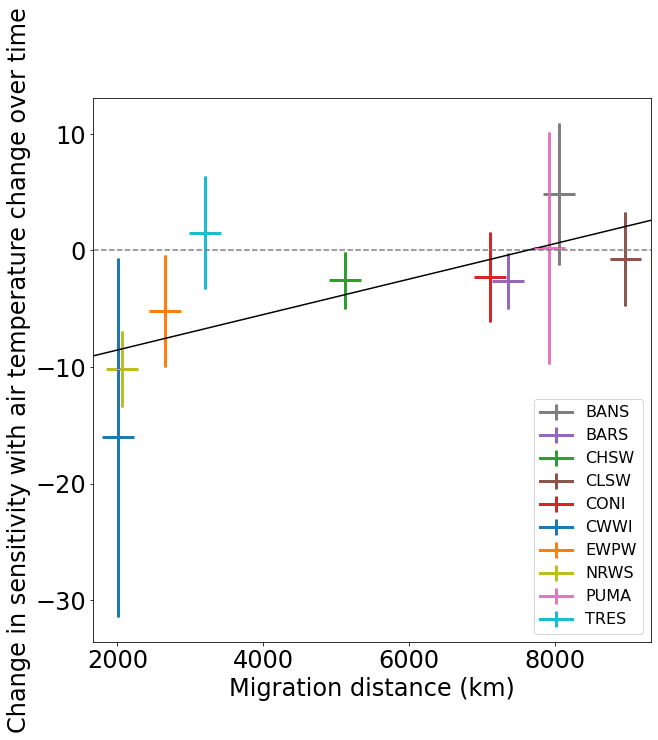

(10, 11)


,scientific_name,slope,r_squared,p_value,err,common_name,body_mass,distance,beta_gamma_mean,mean_arrival_day,species_code
0,Antrostomus carolinensis,-16.031375,0.199691,0.042265,15.410537,Chuck-will's-widow,109.0,2011.374172,3.501294,108.002908,CWWI
1,Antrostomus vociferus,-5.195166,0.184057,0.036444,4.836424,Eastern Whip-poor-will,53.4,2656.170598,3.464462,114.550493,EWPW


In [85]:
# 

df_slopes_temp_change_all_year_masses_dist_traits = make_plot_other_traits(
    df_slopes_temp_change_all_years, 'distance', 'sensitivity_temp_change')
print(df_slopes_temp_change_all_year_masses_dist_traits.shape)

df_slopes_temp_change_all_year_masses_dist_traits.head(2)